In [1]:
!pip install kagglehub
!pip install pandas
!pip install matplotlib
!pip install seaborn

  Using cached kagglehub-0.3.11-py3-none-any.whl.metadata (32 kB)
  Using cached PyYAML-6.0.2-cp311-cp311-macosx_11_0_arm64.whl.metadata (2.1 kB)
  Using cached requests-2.32.3-py3-none-any.whl.metadata (4.6 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
  Using cached charset_normalizer-3.4.1-cp311-cp311-macosx_10_9_universal2.whl.metadata (35 kB)
  Using cached idna-3.10-py3-none-any.whl.metadata (10 kB)
  Using cached urllib3-2.3.0-py3-none-any.whl.metadata (6.5 kB)
  Using cached certifi-2025.1.31-py3-none-any.whl.metadata (2.5 kB)
Using cached kagglehub-0.3.11-py3-none-any.whl (63 kB)
Using cached PyYAML-6.0.2-cp311-cp311-macosx_11_0_arm64.whl (172 kB)
Using cached requests-2.32.3-py3-none-any.whl (64 kB)
Using cached tqdm-4.67.1-py3-none-any.whl (78 kB)
Using cached certifi-2025.1.31-py3-none-any.whl (166 kB)
Using cached charset_normalizer-3.4.1-cp311-cp311-macosx_10_9_universal2.whl (194 kB)
Using cached idna-3.10-py3-none-any.whl (70 kB)
Using cached urllib3-

In [2]:
import kagglehub
path_hotels = kagglehub.dataset_download("raj713335/tbo-hotels-dataset")
print(f"Job Descriptions Path: {path_hotels}")

/Users/owaiskamdar/Desktop/hotel-reccomendation/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Job Descriptions Path: /Users/owaiskamdar/.cache/kagglehub/datasets/raj713335/tbo-hotels-dataset/versions/1


In [3]:
import pandas as pd
import os

hotels = pd.read_csv(path_hotels + "/hotels.csv", encoding="latin1")

hotels.head()






,countyCode,countyName,cityCode,cityName,HotelCode,HotelName,HotelRating,Address,Attractions,Description,FaxNumber,HotelFacilities,Map,PhoneNumber,PinCode,HotelWebsiteUrl
0,AL,Albania,106078,Albanien,1003300,De Paris Hotel,FourStar,Nr. 7 Brigada Viii Street Tirane,NaN,Hotel de Paris is a charming boutique hotel th...,42268822,Private parking Parking onsite Television in c...,41.32213|19.81665,00355 4226 5009,1000,https://www.booking.com/hotel/al/de-paris.html
1,AL,Albania,106078,Albanien,1003301,Hotel Green,FourStar,Rruga Kavajes. Kombinat Km 2. Vaqarr VaqarrTir...,NaN,"Located in a suburb of Tirana, Hotel Green is ...",35548520058,airport pick up wifi available in all areas Ai...,41.30413|19.74703,+35548520057,1041,https://www.booking.com/hotel/al/hotel-green.html
2,AL,Albania,106078,Albanien,1003302,Theranda Hotel,ThreeStar,Rr. Andon Zako Cajupi Villa 6 & 7 Villa 6 & 7T...,NaN,"Set in Tirana, 1.2 km from Skanderbeg Square, ...",00355 (0)42273689,face masks for guests available all plates cu...,41.3216|19.81199,00355 (0)42273766,1019,https://www.booking.com/hotel/al/theranda.html
3,AL,Albania,106078,Albanien,1003303,Seven Hotel,ThreeStar,"KAVAJA STREET, CLOSE TURKISH AMBASSY TIRANA",Skanderbeg Square: within 500 metre,This hotel enjoys an enviable setting in Tiran...,NaN,À la carte dinner Breakfast buffet Breakfast C...,41.328027|19.815052,NaN,1001,http://www.hotelseven-tirana.com/
4,AL,Albania,106078,Albanien,1003325,Viktoria,ThreeStar,Rruga E Elbasanit Km 4 Sauk SaukTirana,NaN,Located in a new residential area at the edge ...,+355695406986,internet services Ironing service Family rooms...,41.29125|19.85349,355 69 5406986,1000,https://www.booking.com/hotel/al/viktoria-sauk...


In [12]:
import os
save_path = "../data/raw"

hotels.to_csv(os.path.join(save_path, "hotels.csv"), index=False)
result = f"Saved to {save_path}/hotels.csv"

In [13]:
print(hotels.info())
print(hotels.describe())
print(hotels.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010033 entries, 0 to 1010032
Data columns (total 16 columns):
 #   Column            Non-Null Count    Dtype 
---  ------            --------------    ----- 
 0   countyCode        1009121 non-null  object
 1    countyName       1010033 non-null  object
 2    cityCode         1010033 non-null  int64 
 3    cityName         1010033 non-null  object
 4    HotelCode        1010033 non-null  int64 
 5    HotelName        1010033 non-null  object
 6    HotelRating      1010033 non-null  object
 7    Address          1009931 non-null  object
 8    Attractions      484941 non-null   object
 9    Description      963028 non-null   object
 10   FaxNumber        449686 non-null   object
 11   HotelFacilities  959655 non-null   object
 12   Map              1009103 non-null  object
 13   PhoneNumber      682896 non-null   object
 14   PinCode          979054 non-null   object
 15   HotelWebsiteUrl  759915 non-null   object
dtypes: int64(2), objec

In [20]:
hotels_cleaned = hotels.copy()

# Fix column names (strip leading/trailing whitespace)
hotels_cleaned.columns = hotels_cleaned.columns.str.strip()
# drop duplicates
hotels_cleaned = hotels_cleaned.drop_duplicates()

hotels_cleaned.rename(columns={'countyName': 'country'}, inplace=True)

# change the name of column cityName to city
hotels_cleaned.rename(columns={'cityName': 'city'}, inplace=True)

# replace ratings with numeric values
hotels_cleaned['HotelRating'] = hotels_cleaned['HotelRating'].replace({'OneStar': 1, 'TwoStar': 2, 'ThreeStar': 3, 'FourStar': 4, 'FiveStar': 5})

# drop useless columns
hotels_cleaned.drop(columns=['countyCode', 'FaxNumber', 'PhoneNumber', 'PinCode', 'HotelWebsiteUrl', 'cityCode', 'HotelCode'], inplace=True)

# split map into two columns
hotels_cleaned[['Latitude', 'Longitude']] = hotels_cleaned['Map'].str.split('|', expand=True)

# drop map column
hotels_cleaned.drop(columns=['Map'], inplace=True)


hotels_cleaned.head()



# hotels_cleaned.describe()
# hotels_cleaned.isnull().sum()
# hotels_cleaned.duplicated().sum()

# save the cleaned data
hotels_cleaned.to_csv(os.path.join("../data/processed", "hotels_cleaned.csv"), index=False)
result = f"Saved to {save_path}/hotels_cleaned.csv"




In [21]:
#columnn names
hotels_cleaned.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010033 entries, 0 to 1010032
Data columns (total 10 columns):
 #   Column           Non-Null Count    Dtype 
---  ------           --------------    ----- 
 0   country          1010033 non-null  object
 1   city             1010033 non-null  object
 2   HotelName        1010033 non-null  object
 3   HotelRating      1010033 non-null  object
 4   Address          1009931 non-null  object
 5   Attractions      484941 non-null   object
 6   Description      963028 non-null   object
 7   HotelFacilities  959655 non-null   object
 8   Latitude         1009103 non-null  object
 9   Longitude        1009103 non-null  object
dtypes: object(10)
memory usage: 77.1+ MB


In [22]:
# unique values in each column
for col in hotels_cleaned.columns:
    print(f"{col}: {hotels_cleaned[col].nunique()}")

# check for duplicates
hotels_cleaned.duplicated().sum()




country: 136
city: 41821
HotelName: 719402
HotelRating: 6
Address: 739796
Attractions: 357697
Description: 732444
HotelFacilities: 656894
Latitude: 703010
Longitude: 716579


np.int64(13)

In [23]:
print(hotels.columns)
print(hotels_cleaned.columns)

Index(['countyCode', ' countyName', ' cityCode', ' cityName', ' HotelCode',
       ' HotelName', ' HotelRating', ' Address', ' Attractions',
       ' Description', ' FaxNumber', ' HotelFacilities', ' Map',
       ' PhoneNumber', ' PinCode', ' HotelWebsiteUrl'],
      dtype='object')
Index(['country', 'city', 'HotelName', 'HotelRating', 'Address', 'Attractions',
       'Description', 'HotelFacilities', 'Latitude', 'Longitude'],
      dtype='object')


In [25]:
hotels_all = hotels_cleaned[hotels_cleaned['HotelRating'].str.lower() == 'all']

hotels_all['city'].value_counts().head(10)  # Top cities where 'All' occurs

city
Usedom                  1698
Orlando,   Florida      1510
Cannes                  1124
Heringsdorf             1073
La Spezia                966
Nizza (Nice)             936
Kwazulu Natal            927
Kissimmee,   Florida     815
Buenos Aires             785
Cordoba                  721
Name: count, dtype: int64

In [28]:
# values in hotel rating
print(hotels_cleaned['HotelRating'].value_counts())
# values in hotel country
print(hotels_cleaned['country'].value_counts())





HotelRating
3      352613
All    315668
2      159754
4      130862
1       28734
5       22402
Name: count, dtype: int64
country
United States     139868
Italy              95977
Spain              81620
United Kingdom     68169
France             56247
                   ...  
San Marino            42
Qatar                 41
Libya                 16
Gibraltar              8
Yemen Republic         5
Name: count, Length: 136, dtype: int64


In [33]:
# set option for max col width
pd.set_option('display.max_colwidth', None)

# check 10 values in the hotel facilities
hotels_cleaned['HotelFacilities'].head(15)

0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  Private parking Parking onsite Television in common areas Airport transportation (surcharge) Area shuttle (surcharge) Private check-in/check-out Concierge services Designated smokin

In [30]:
!pip install rapidfuzz

  Using cached rapidfuzz-3.13.0-cp311-cp311-macosx_11_0_arm64.whl.metadata (12 kB)
Using cached rapidfuzz-3.13.0-cp311-cp311-macosx_11_0_arm64.whl (1.5 MB)


In [ ]:
import pandas as pd
import re
from rapidfuzz import process
from functools import lru_cache

# Load cleaned data
hotels_cleaned = pd.read_csv("../data/processed/hotels_cleaned.csv", encoding="latin1")

# Amenity vocabulary
amenity_vocab = {
    "wifi", "air conditioning", "pool", "gym", "private parking", "parking", "beach", "tv", 
    "concierge", "restaurant", "room service", "airport pickup", "laundry", "shuttle", 
    "kids play area", "balcony", "free parking", "pet friendly", "spa", "breakfast", 
    "security", "atm", "terrace", "ironing service", "television", "office", "valet", "24-hours", 
    "currency exchange", "bar", "bike rental", "computer station", "electric car charging station", 
    "playground", "meeting rooms", "garden"
}

# Cached fuzzy matcher
@lru_cache(maxsize=None)
def cached_match(phrase):
    match = process.extractOne(phrase, amenity_vocab, score_cutoff=80)
    return match[0].title() if match else None

# Amenity extraction
def extract_amenities(text):
    if pd.isna(text):
        return []
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    tokens = text.split()

    phrases = (
        tokens +
        [' '.join(tokens[i:i+2]) for i in range(len(tokens)-1)] +
        [' '.join(tokens[i:i+3]) for i in range(len(tokens)-2)]
    )

    found = set()
    for phrase in phrases:
        result = cached_match(phrase)
        if result:
            found.add(result)
    return list(found)

# Apply the extraction
hotels_cleaned['ParsedAmenities'] = hotels_cleaned['HotelFacilities'].apply(extract_amenities)

hotels_cleaned.head()

,country,city,HotelName,HotelRating,Address,Attractions,Description,HotelFacilities,Latitude,Longitude,ParsedAmenities
0,Albania,Albanien,De Paris Hotel,4,Nr. 7 Brigada Viii Street Tirane,NaN,Hotel de Paris is a charming boutique hotel th...,Private parking Parking onsite Television in c...,41.322130,19.816650,"[Airport Pickup, Free Parking, Air Conditionin..."
1,Albania,Albanien,Hotel Green,4,Rruga Kavajes. Kombinat Km 2. Vaqarr VaqarrTir...,NaN,"Located in a suburb of Tirana, Hotel Green is ...",airport pick up wifi available in all areas Ai...,41.304130,19.747030,"[Airport Pickup, Wifi, Shuttle, Meeting Rooms,..."
2,Albania,Albanien,Theranda Hotel,3,Rr. Andon Zako Cajupi Villa 6 & 7 Villa 6 & 7T...,NaN,"Set in Tirana, 1.2 km from Skanderbeg Square, ...",face masks for guests available all plates cu...,41.321600,19.811990,"[Airport Pickup, Free Parking, Air Conditionin..."
3,Albania,Albanien,Seven Hotel,3,"KAVAJA STREET, CLOSE TURKISH AMBASSY TIRANA",Skanderbeg Square: within 500 metre,This hotel enjoys an enviable setting in Tiran...,Ã la carte dinner Breakfast buffet Breakfast ...,41.328027,19.815052,"[Currency Exchange, Air Conditioning, Private ..."
4,Albania,Albanien,Viktoria,3,Rruga E Elbasanit Km 4 Sauk SaukTirana,NaN,Located in a new residential area at the edge ...,internet services Ironing service Family rooms...,41.291250,19.853490,"[Airport Pickup, Free Parking, Air Conditionin..."


In [35]:
hotels_cleaned[['HotelName', 'HotelFacilities', 'ParsedAmenities']].head()

,HotelName,HotelFacilities,ParsedAmenities
0,De Paris Hotel,Private parking Parking onsite Television in common areas Airport transportation (surcharge) Area shuttle (surcharge) Private check-in/check-out Concierge services Designated smoking areas Air conditioning Non-smoking throughout Free WiFi Free WiFi Luggage storage Fax/photocopying Heating Car hire Currency exchange Internet access Ironing service Breakfast service Family rooms Dry cleaning/laundry service Laundry facilities Airport shuttle Non-smoking rooms Terrace Garden Free newspapers in lobby 24-hour front desk Bar/lounge Meeting rooms Room service Pets allowed Restaurant Free self parking,"[Airport Pickup, Free Parking, Air Conditioning, Breakfast, Room Service, Shuttle, Parking, Concierge, Wifi, Meeting Rooms, Electric Car Charging Station, Ironing Service, Private Parking, Bar, Laundry, Garden, Terrace, Currency Exchange, 24-Hours, Restaurant, Kids Play Area, Television, Spa]"
1,Hotel Green,airport pick up wifi available in all areas Air conditioning Free WiFi wifi Luggage storage Fax/photocopying Packed lunches express check-in/check-out lift internet services Business centre Airport shuttle Non-smoking rooms 24-hour front desk Bar meeting/banquet facilities Room service Pets allowed Restaurant,"[Airport Pickup, Wifi, Shuttle, Meeting Rooms, Free Parking, Air Conditioning, Private Parking, 24-Hours, Restaurant, Kids Play Area, Bar, Room Service]"
2,Theranda Hotel,face masks for guests available all plates cutlery glasses and other tableware have been sanitized invoice provided hand sanitizer in guest accommodation and key areas food can be delivered to guest accommodation linens towels and laundry washed in accordance with local authority guidelines use of cleaning chemicals that are effective against coronavirus Security alarm Shuttle service airport drop off airport pick up Fruits Wine/champagne wifi available in all areas Private parking Daily housekeeping airport shuttle (additional charge) shuttle service (additional charge) Private check-in/check-out concierge service Sun terrace Air conditioning Free WiFi wifi Currency exchange express check-in/check-out internet services Free parking Ironing service breakfast in the room Family rooms dry cleaning Laundry Business centre Airport shuttle Non-smoking rooms Garden 24-hour front desk Bar meeting/banquet facilities Room service Parking,"[Airport Pickup, Free Parking, Air Conditioning, Office, Breakfast, Room Service, Shuttle, Wifi, Parking, Concierge, Meeting Rooms, Security, Ironing Service, Private Parking, Bar, Laundry, Garden, Terrace, Beach, Currency Exchange, 24-Hours, Kids Play Area]"
3,Seven Hotel,Ã la carte dinner Breakfast buffet Breakfast Conference room Air conditioning in Restaurant Restaurant Bar Currency exchange facilities Air conditioning in public areas Visa MasterCard Hotel,"[Currency Exchange, Air Conditioning, Private Parking, Restaurant, Breakfast, Kids Play Area, Bar, Room Service]"
4,Viktoria,internet services Ironing service Family rooms Laundry Airport shuttle Non-smoking rooms Garden 24-hour front desk Bar Room service Restaurant Fire extinguishers CCTV outside property CCTV in common areas 24-hour security wifi available in all areas Daily housekeeping shared lounge/TV area airport shuttle (additional charge) Special diet menus (on request) shuttle service (additional charge) Air conditioning Non-smoking throughout Free WiFi wifi Luggage storage Fax/photocopying Heating Car hire Currency exchange Safety Deposit Box express check-in/check-out,"[Airport Pickup, Free Parking, Air Conditioning, Room Service, Shuttle, Wifi, Meeting Rooms, Concierge, Electric Car Charging Station, Security, Ironing Service, Private Parking, Bar, Laundry, Garden, Tv, Currency Exchange, 24-Hours, Restaurant, Kids Play Area]"


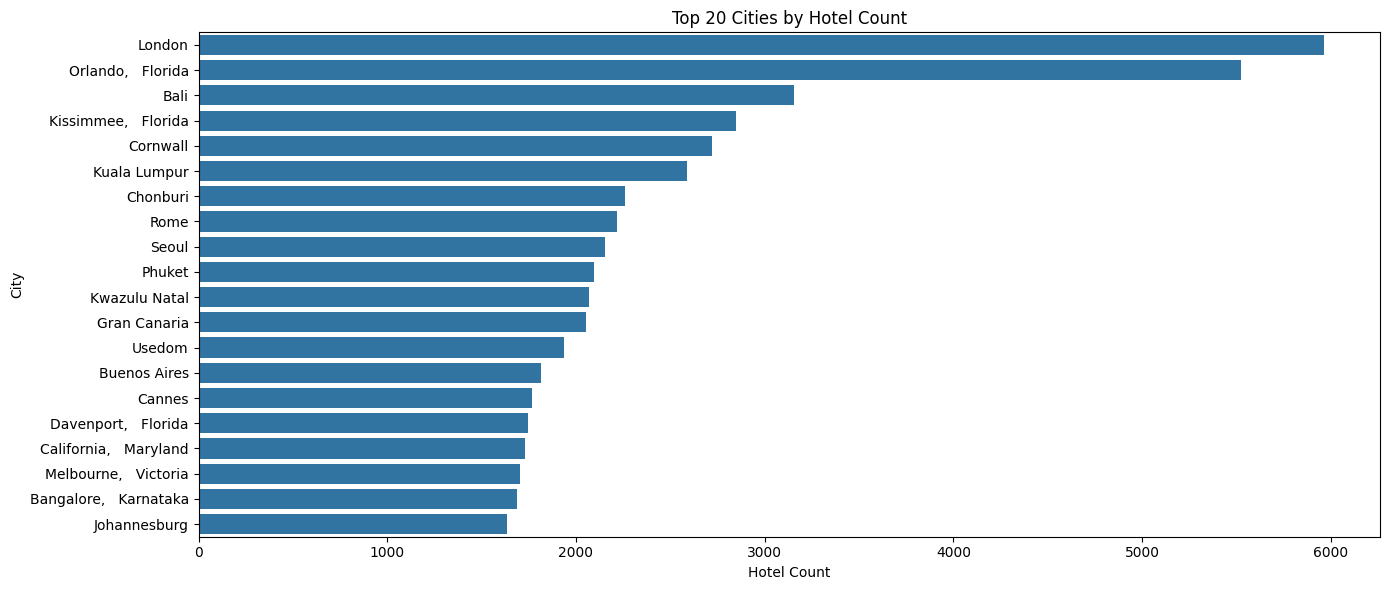

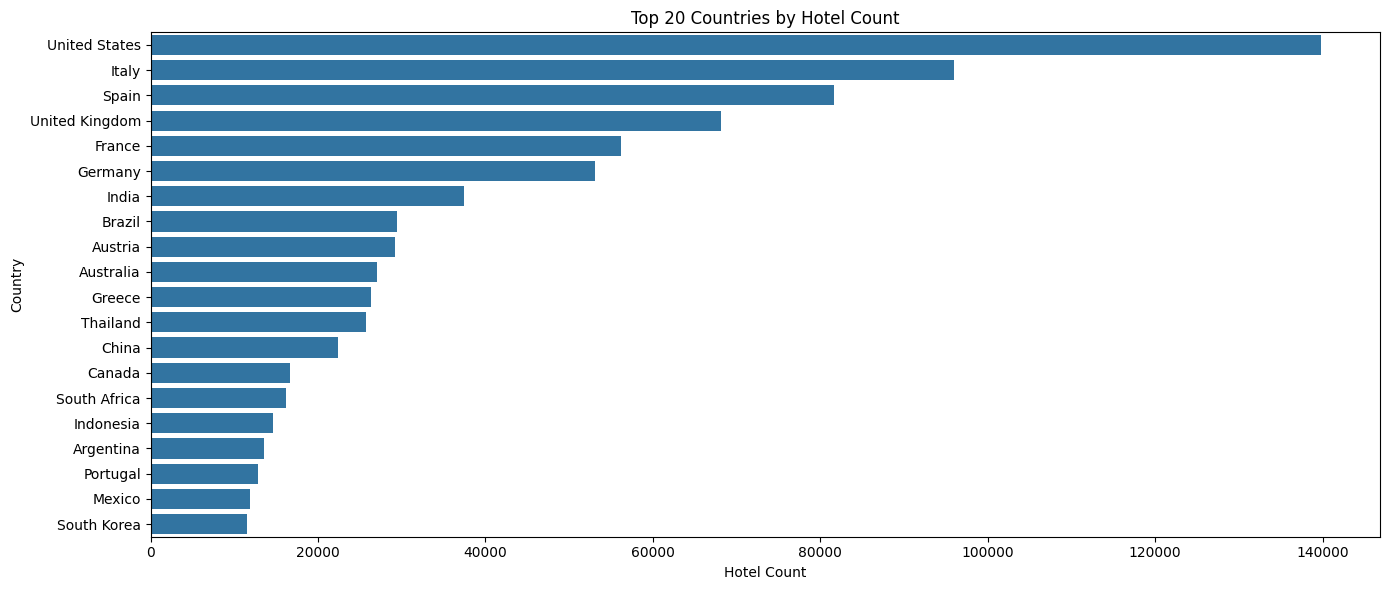

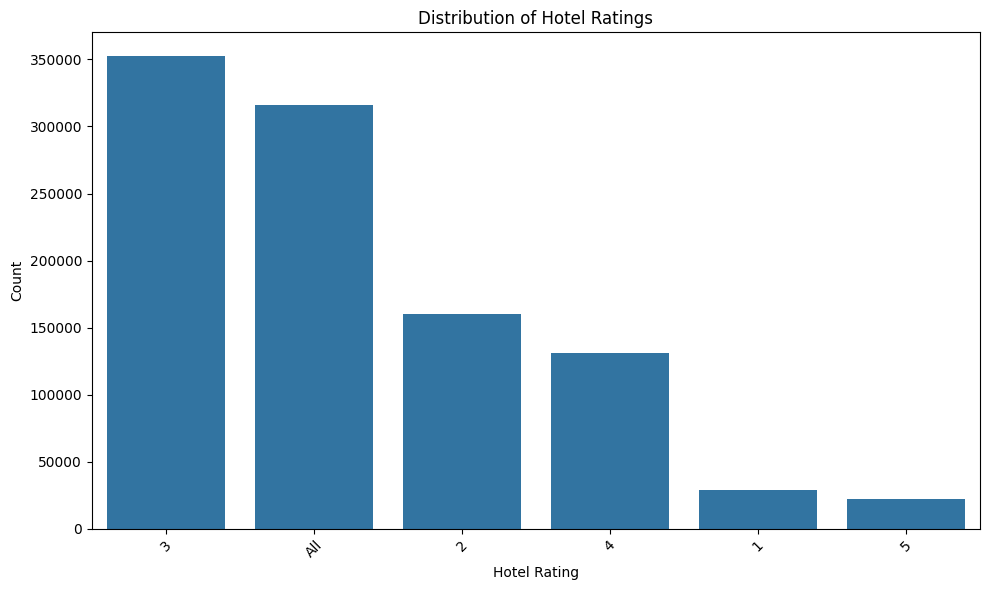

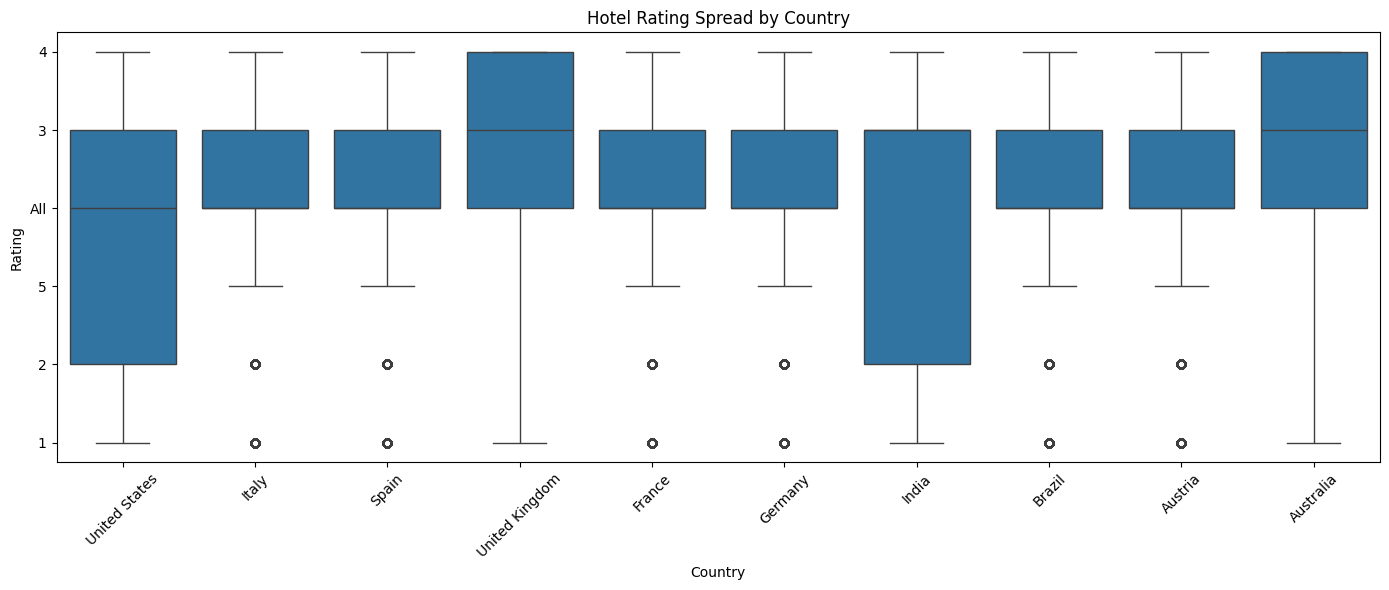

In [37]:
pd.reset_option('display.max_colwidth')

import matplotlib.pyplot as plt
import seaborn as sns

# Hotels per city
plt.figure(figsize=(14, 6))
sns.countplot(data=hotels_cleaned, y='city', order=hotels_cleaned['city'].value_counts().head(20).index)
plt.title('Top 20 Cities by Hotel Count')
plt.xlabel('Hotel Count')
plt.ylabel('City')
plt.tight_layout()
plt.show()

# Hotels per country
plt.figure(figsize=(14, 6))
sns.countplot(data=hotels_cleaned, y='country', order=hotels_cleaned['country'].value_counts().head(20).index)
plt.title('Top 20 Countries by Hotel Count')
plt.xlabel('Hotel Count')
plt.ylabel('Country')
plt.tight_layout()
plt.show()


# check distrubtions of ratings
plt.figure(figsize=(10, 6))
sns.countplot(data=hotels_cleaned, x='HotelRating', order=hotels_cleaned['HotelRating'].value_counts().index)
plt.title('Distribution of Hotel Ratings')
plt.xlabel('Hotel Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# hotel rating spread by country

plt.figure(figsize=(14, 6))
sns.boxplot(data=hotels_cleaned, x='country', y='HotelRating', order=hotels_cleaned['country'].value_counts().head(10).index)
plt.title("Hotel Rating Spread by Country")
plt.xlabel("Country")
plt.ylabel("Rating")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



